In [29]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# 讀取資料 from 
train = pd.read_csv("C:/Users/User/Desktop/kaggle/Titanic/train.csv")
test  = pd.read_csv("C:/Users/User/Desktop//kaggle/Titanic//test.csv")
data = train.append(test)
data['Sex'] = data['Sex'].map ( { 'female':0 , 'male':1 } ).astype(int)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


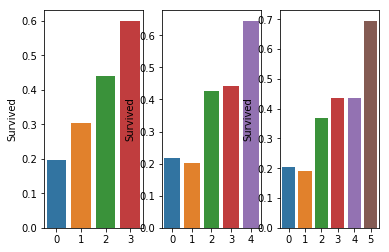

In [30]:
data['Fare'] = data['Fare'].map(lambda x: np.log10(x) if x>0 else 0)
data['Fare 4'] = pd.qcut(data['Fare'],4).astype(str)
data['Fare 5'] = pd.qcut(data['Fare'],5).astype(str)
data['Fare 6'] = pd.qcut(data['Fare'],6).astype(str)
#train['Fare 4'] = train['Fare 4'].astype(str)#轉換區間為字符以便encoder

label = LabelEncoder()
data['Fare 4'] = label.fit_transform(data['Fare 4'] )
data['Fare 5'] = label.fit_transform(data['Fare 5'] )
data['Fare 6'] = label.fit_transform(data['Fare 6'] )


y4 = data.groupby('Fare 4')['Survived'].mean()
y5 = data.groupby('Fare 5')['Survived'].mean()
y6 = data.groupby('Fare 6')['Survived'].mean()


pos = [0,1,2,3]
plt.subplot(1, 3, 1)
sns.barplot(pos,y4)
pos = [0,1,2,3,4]
plt.subplot(1, 3, 2)
sns.barplot(pos,y5)
pos = [0,1,2,3,4,5]
plt.subplot(1, 3, 3)
sns.barplot(pos,y6)

In [31]:
fare=['Sex','Pclass','Fare 5']
test  = data[data['Survived'].isnull()]
train = data[data['Survived'].notnull()]
Y = train['Survived']
X = train.drop(['Survived','PassengerId'],axis=1)

Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Model.fit(X[fare],Y)
print(Model.oob_score_)

0.8103254769921436


In [32]:
X_submit = test.drop(['PassengerId'],axis=1)
Y_submit = Model.predict(X_submit[fare])

submit = pd.DataFrame({"PassengerId": test['PassengerId'],
                      "Survived":Y_submit.astype(int)})
submit.to_csv("submit Fare cut.csv",index=False)